# Tratamento de dados

In [1]:
import pandas as pd

C:\Users\victo\AppData\Local\Temp\ipykernel_12316\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
tabela = pd.read_excel("Desafio Inteligência 1.xlsx", sheet_name="Base")
tabela.head()

,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM
0,Loja 11000,2022-12-19,7,1933.88,SITE
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2
4,Loja 31004,2022-05-13,1,202.03,SITE


In [3]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [4]:
tabela.isnull().sum()

CONTRATO           0
DATA DA CRIACAO    0
DIARIAS            0
VALOR TOTAL        0
ORIGEM             0
dtype: int64

In [5]:
tabela["Ticket_Medio"] = tabela["VALOR TOTAL"] / tabela["DIARIAS"]


In [6]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
 5   Ticket_Medio     54536 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 2.5+ MB


In [7]:
tabela.head()

,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM,Ticket_Medio
0,Loja 11000,2022-12-19,7,1933.88,SITE,276.268571
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO,187.037500
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1,76.506667
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2,107.976000
4,Loja 31004,2022-05-13,1,202.03,SITE,202.030000


In [ ]:
# Definindo a data como índice
tabela.set_index('DATA DA CRIACAO', inplace=True)

ticket_medio_series = tabela['Ticket_Medio'].resample('M').mean()

# Exibindo a série temporal
print(ticket_medio_series)

DATA DA CRIACAO
2022-01-31    182.902368
2022-02-28    158.890442
2022-03-31    145.442032
2022-04-30    142.541228
2022-05-31    137.650923
2022-06-30    145.128194
2022-07-31    170.771388
2022-08-31    156.029144
2022-09-30    158.130474
2022-10-31    161.339727
2022-11-30    157.457066
2022-12-31    187.361183
2023-01-31    169.097562
2023-02-28    146.394492
2023-03-31    149.933765
2023-04-30    166.919736
2023-05-31    149.402665
2023-06-30    157.325616
2023-07-31    195.717049
2023-08-31    144.183129
2023-09-30    149.675707
2023-10-31    156.356435
2023-11-30    160.008773
2023-12-31    231.681291
2024-01-31    209.838699
2024-02-29    173.944790
2024-03-31    177.324679
2024-04-30    181.990764
2024-05-31    181.579425
2024-06-30    197.375425
2024-07-31    209.646495
2024-08-31    180.439599
2024-09-30    181.322177
2024-10-31    188.620151
2024-11-30    188.249776
Freq: ME, Name: Ticket_Medio, dtype: float64


C:\Users\victo\AppData\Local\Temp\ipykernel_12316\4110512626.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ticket_medio_series = tabela['Ticket_Medio'].resample('M').mean()


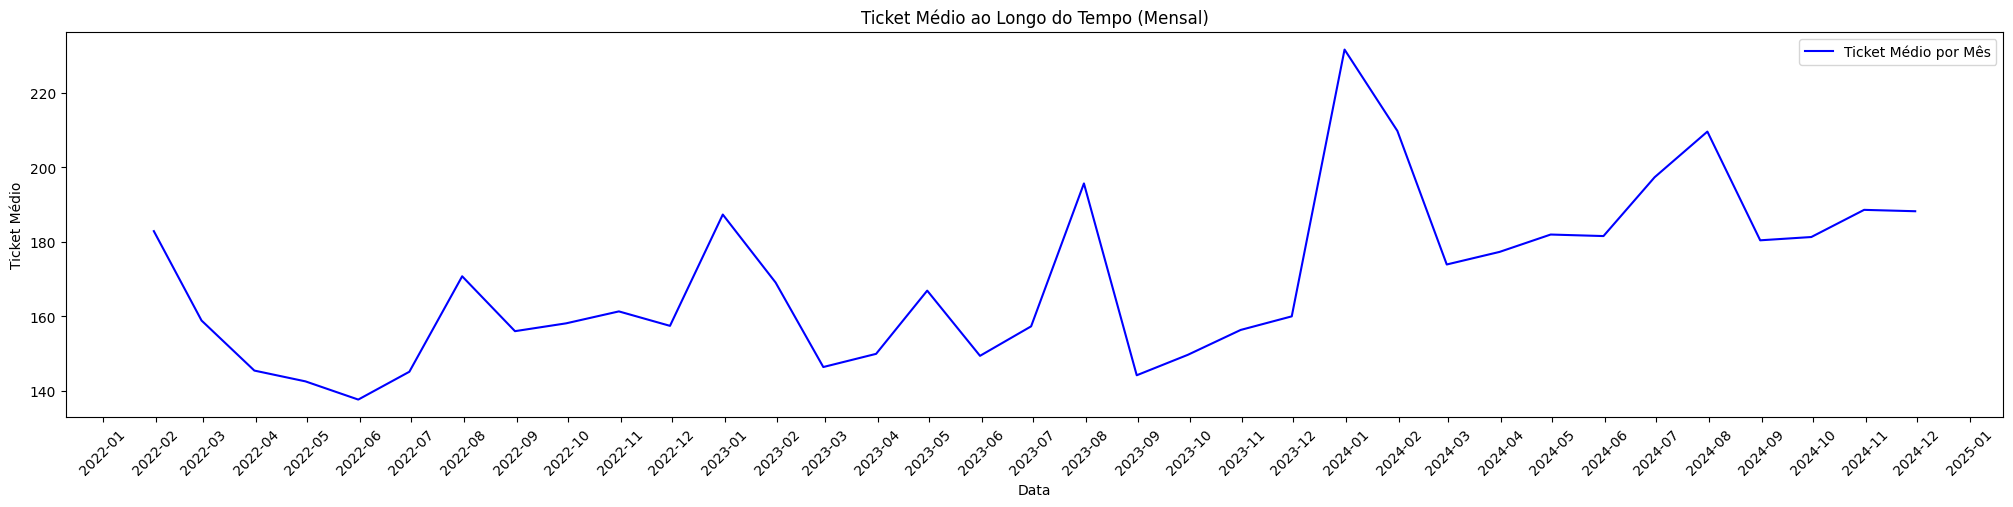

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# plotar a série temporal de Ticket_Medio ao longo do tempo

plt.figure(figsize=(25, 5))  # Tamanho da figura

# Plotar a série temporal de Ticket_Medio
plt.plot(ticket_medio_series, label="Ticket Médio por Mês", color="blue")

# Formatar o eixo x para mostrar por mês
plt.xlabel("Data")
plt.ylabel("Ticket Médio")
plt.title("Ticket Médio ao Longo do Tempo (Mensal)")
plt.legend()

# Ajustar os rótulos do eixo x para mostrar todos os meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Exibe uma tick para cada mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Formato ano-mês (ex: 2023-01)
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura

# Exibir o gráfico
plt.show()


<Figure size 2000x1000 with 0 Axes>

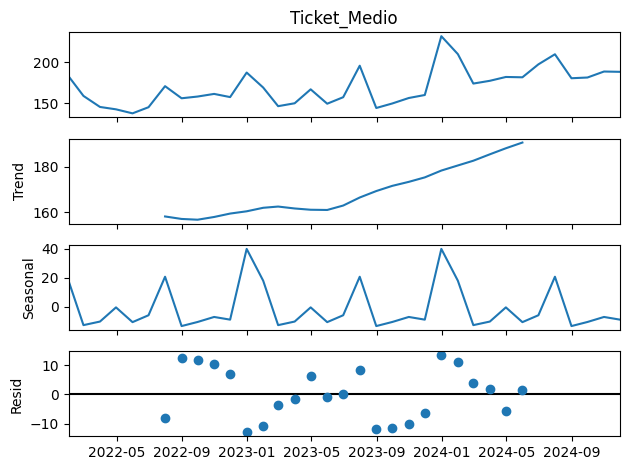

In [10]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva com dados mensais de Ticket_Medio e período de sazonalidade anual (12 meses)
decomp = seasonal_decompose(ticket_medio_series, model="additive", period=12)

# Ajustando o tamanho da figura
plt.figure(figsize=(20, 10))  # Ajuste o tamanho conforme necessário

# Plotar os componentes da decomposição (tendência, sazonalidade, resíduo)
decomp.plot()

# Ajuste de layout para evitar sobreposição de gráficos
plt.tight_layout()

# Exibir o gráfico
plt.show()


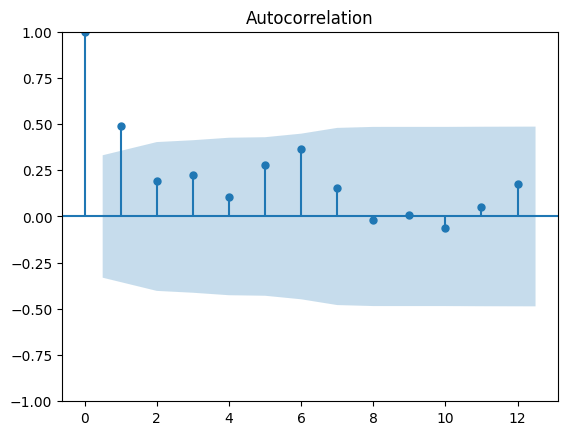

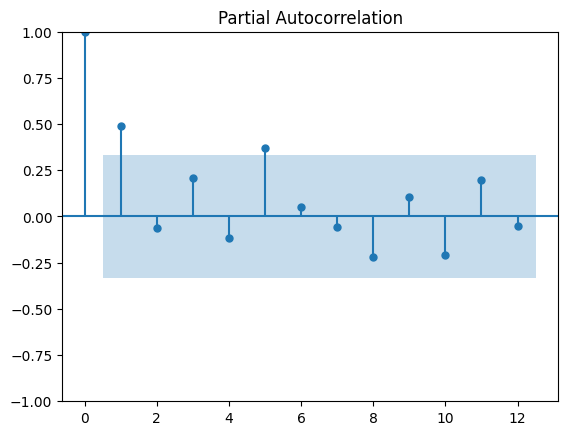

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotar autocorrelação 
plot_acf(ticket_medio_series, lags=12)
plt.show()

# Plotar autocorrelação parcial 
plot_pacf(ticket_medio_series, lags=12)
plt.show()



In [12]:
# teste estatístico  para verificar se uma série temporal é estacionária
from statsmodels.tsa.stattools import adfuller

result = adfuller(ticket_medio_series)
print('Valor p:', result[1])


Valor p: 0.985069572302899


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Max

                                      SARIMAX Results                                       
Dep. Variable:                         Ticket_Medio   No. Observations:                   35
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 -84.800
Date:                              Tue, 18 Mar 2025   AIC                            183.599
Time:                                      03:19:14   BIC                            191.237
Sample:                                  01-31-2022   HQIC                           185.399
                                       - 11-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0101      0.707      0.014      0.989      -1.376       1.396
ar.L2          0.13

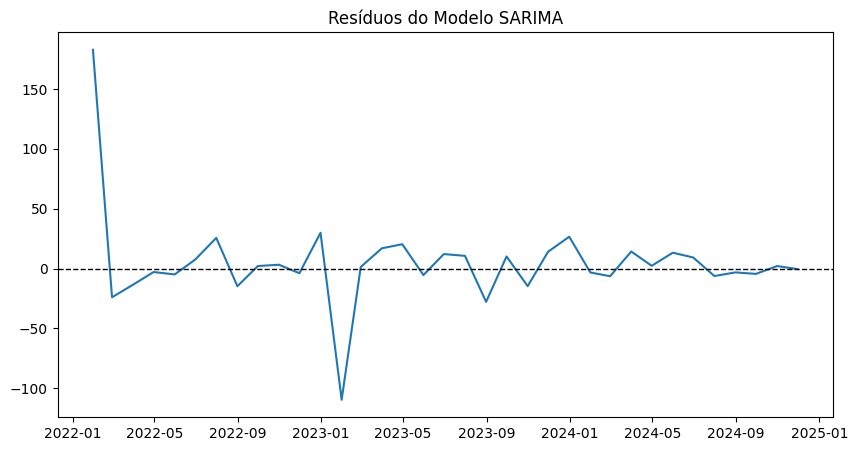

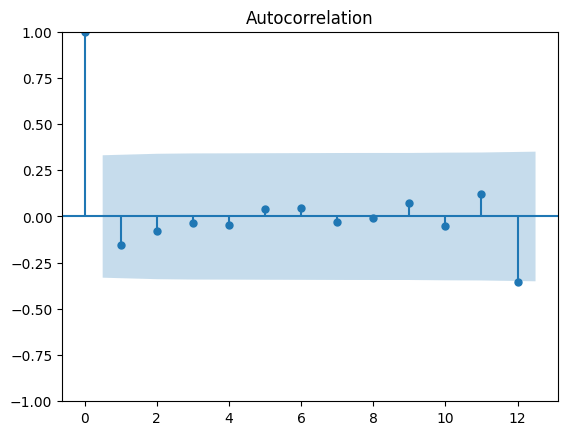

C:\Users\victo\AppData\Local\Temp\ipykernel_12316\3854706630.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas_futuras = pd.date_range(ticket_medio_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')



Previsões para os próximos 12 meses:
                 Data  Previsão  IC Inferior  IC Superior
2024-12-31 2024-12-31    223.33       211.04       235.62
2025-01-31 2025-01-31    200.91       183.45       218.37
2025-02-28 2025-02-28    171.72       154.10       189.34
2025-03-31 2025-03-31    182.97       165.20       200.73
2025-04-30 2025-04-30    202.48       184.69       220.26
2025-05-31 2025-05-31    188.25       170.45       206.05
2025-06-30 2025-06-30    200.52       182.72       218.32
2025-07-31 2025-07-31    230.94       213.14       248.74
2025-08-31 2025-08-31    174.46       156.65       192.26
2025-09-30 2025-09-30    179.10       161.29       196.91
2025-10-31 2025-10-31    187.62       169.78       205.46
2025-11-30 2025-11-30    192.87       175.01       210.74


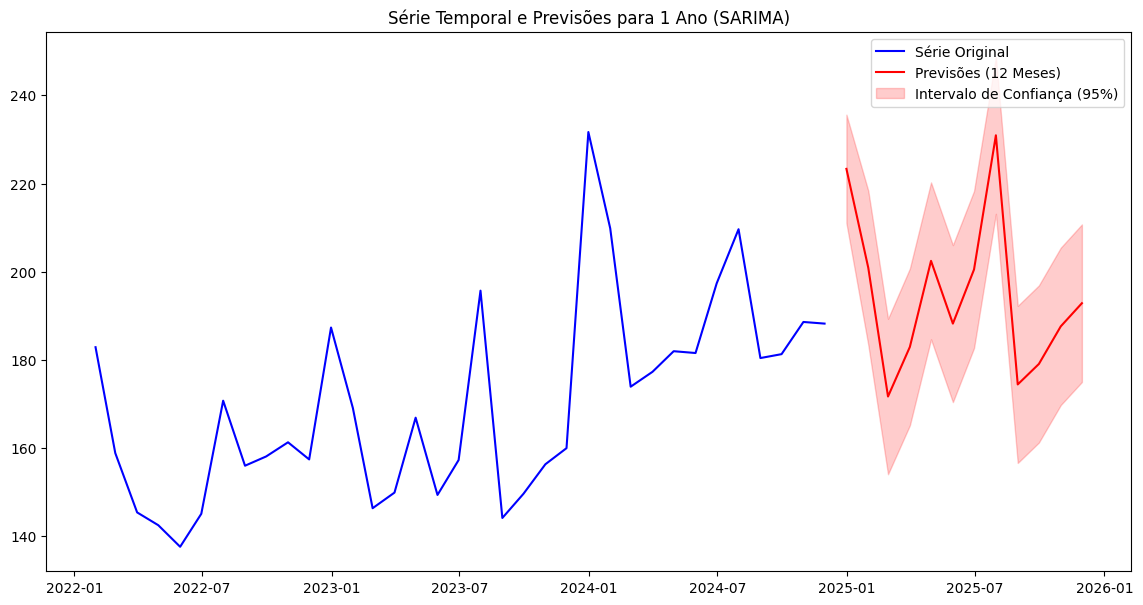

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

# Ajustando o modelo SARIMA para dados mensais
modelo_sarima = SARIMAX(ticket_medio_series, 
                        order=(2, 1, 2),        # Parâmetros ARIMA (p, d, q)
                        seasonal_order=(1, 1, 1, 12))  # Parâmetros sazonais (P, D, Q, s=12 para sazonalidade anual)

# Ajustando o modelo
modelo_ajustado = modelo_sarima.fit()

# Visualizar o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Plotar os resíduos para verificar o ajuste do modelo
residuos = modelo_ajustado.resid.dropna()  # Remove NaNs
plt.figure(figsize=(10, 5))
plt.plot(residuos)
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.title("Resíduos do Modelo SARIMA")
plt.show()

# Plotar o ACF dos resíduos
plot_acf(residuos, lags=12)  # Como é mensal, 12 lags cobrem um ano
plt.show()

# Fazer previsões para os próximos 12 meses com intervalo de confiança
previsao = modelo_ajustado.get_forecast(steps=12)
previsao_ano = previsao.predicted_mean 

# Obter intervalos de confiança (95% por padrão) 
ic = previsao.conf_int()  
ic_inf = ic.iloc[:, 0]  # Primeira coluna (limite inferior)
ic_sup = ic.iloc[:, 1]  # Segunda coluna (limite superior)

# Criar datas futuras a partir do último índice da série original
datas_futuras = pd.date_range(ticket_medio_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Exibir previsões com intervalo de confiança
previsoes_df = pd.DataFrame({
    "Data": datas_futuras,
    "Previsão": previsao_ano,
    "IC Inferior": ic_inf,
    "IC Superior": ic_sup
})
print("\nPrevisões para os próximos 12 meses:")
print(previsoes_df.round(2).head(12))

# Plotar a série original e as previsões com intervalo de confiança
plt.figure(figsize=(14, 7))
plt.plot(ticket_medio_series, label='Série Original', color='blue')
plt.plot(datas_futuras, previsao_ano, label='Previsões (12 Meses)', color='red')

# Adicionar intervalo de confiança (sombreado)
plt.fill_between(datas_futuras, ic_inf, ic_sup, color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

plt.title("Série Temporal e Previsões para 1 Ano (SARIMA)")
plt.legend()
plt.show()


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Criar previsões dentro da amostra (in-sample) para comparação com valores reais
previsoes_in_sample = modelo_ajustado.fittedvalues

# Remover os primeiros valores onde a diferenciação pode ter gerado NaN
y_true = ticket_medio_series.iloc[1:]  # Ajustar para bater com previsões
y_pred = previsoes_in_sample.iloc[1:]

# Cálculo das métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Exibir as métricas
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 13.74
MSE: 537.21
RMSE: 23.18
MAPE: 8.18%


In [15]:
from itertools import product
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definindo o grid de hiperparâmetros para testar
p_values = [0, 1, 2, 3]  # Valores para o parâmetro p (AR)
d_values = [0, 1]        # Valores para o parâmetro d (Diferenciação)
q_values = [0, 1, 2]     # Valores para o parâmetro q (MA)

P_values = [0, 1, 2]     # Valores para o parâmetro sazonal P
D_values = [0, 1]        # Valores para o parâmetro sazonal D
Q_values = [0, 1, 2]     # Valores para o parâmetro sazonal Q
s_values = [12]          # Sazonalidade anual (12 meses)

# Gerar todas as combinações possíveis de hiperparâmetros
param_grid = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Armazenar os resultados
resultados = []

# Função para calcular as métricas de erro
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, mape

# Testar todas as combinações de parâmetros
for params in param_grid:
    p, d, q, P, D, Q, s = params
    
    try:
        # Ajuste do modelo SARIMA
        modelo_sarima = SARIMAX(ticket_medio_series, 
                                order=(p, d, q), 
                                seasonal_order=(P, D, Q, s))
        modelo_ajustado = modelo_sarima.fit(disp=False)  # Ajustando o modelo

        # Gerar previsões para o in-sample
        previsoes_in_sample = modelo_ajustado.fittedvalues
        
        # Remover os primeiros valores onde a diferenciação pode ter gerado NaN
        y_true = ticket_medio_series.iloc[1:]  # Ajustar para bater com previsões
        y_pred = previsoes_in_sample.iloc[1:]

        # Calcular as métricas
        mae, mse, rmse, mape = calcular_metricas(y_true, y_pred)

        # Armazenar os resultados e métricas
        resultados.append((params, mae, mse, rmse, mape))
        
    except Exception as e:
        # Se ocorrer um erro durante o ajuste do modelo, ignora
        pass

# Ordenar os resultados para escolher a melhor combinação com base no MAPE (ou outra métrica)
resultados_ordenados = sorted(resultados, key=lambda x: x[4])  # Ordenando por MAPE (índice 4)

# Exibir os melhores resultados
print("\nMelhores combinações de parâmetros:")
for resultado in resultados_ordenados[:5]:  # Exibir as 5 melhores combinações
    params, mae, mse, rmse, mape = resultado
    print(f"Parâmetros: {params} | MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to e


Melhores combinações de parâmetros:
Parâmetros: (3, 0, 0, 1, 0, 1, 12) | MAE: 10.80 | MSE: 226.98 | RMSE: 15.07 | MAPE: 6.32%
Parâmetros: (1, 1, 1, 1, 0, 1, 12) | MAE: 10.87 | MSE: 224.90 | RMSE: 15.00 | MAPE: 6.34%
Parâmetros: (3, 1, 1, 1, 0, 1, 12) | MAE: 10.90 | MSE: 228.50 | RMSE: 15.12 | MAPE: 6.39%
Parâmetros: (2, 1, 1, 1, 0, 1, 12) | MAE: 10.89 | MSE: 220.04 | RMSE: 14.83 | MAPE: 6.39%
Parâmetros: (2, 0, 0, 1, 0, 1, 12) | MAE: 10.97 | MSE: 232.78 | RMSE: 15.26 | MAPE: 6.41%


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                      SARIMAX Results                                       
Dep. Variable:                         Ticket_Medio   No. Observations:                   35
Model:             SARIMAX(3, 0, 0)x(1, 0, [1], 12)   Log Likelihood                -148.026
Date:                              Tue, 18 Mar 2025   AIC                            308.051
Time:                                      03:28:48   BIC                            317.384
Sample:                                  01-31-2022   HQIC                           311.273
                                       - 11-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8027      0.238      3.377      0.001       0.337       1.269
ar.L2         -0.06

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


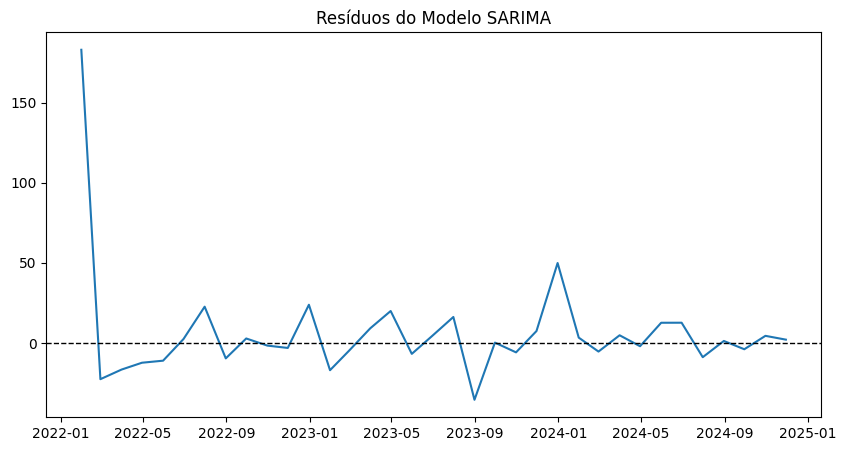

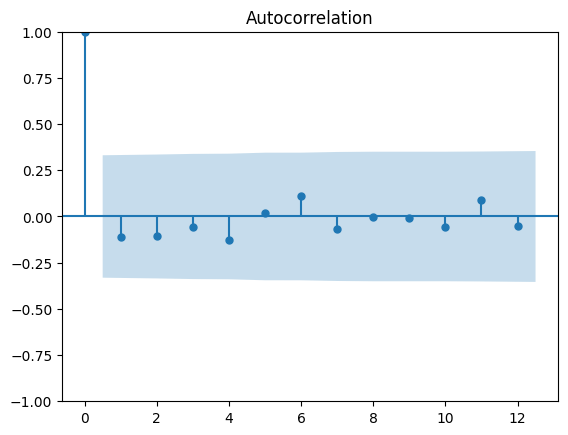

C:\Users\victo\AppData\Local\Temp\ipykernel_12316\150144956.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas_futuras = pd.date_range(ticket_medio_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
C:\Users\victo\AppData\Local\Temp\ipykernel_12316\150144956.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  todas_datas = pd.date_range(ticket_medio_series.index[0], datas_futuras[-1], freq='M')



Previsões para os próximos 12 meses:
                 Data  Previsão  IC Inferior  IC Superior
2024-12-31 2024-12-31    228.68       204.15       253.21
2025-01-31 2025-01-31    210.52       179.70       241.35
2025-02-28 2025-02-28    184.68       151.29       218.07
2025-03-31 2025-03-31    181.50       145.21       217.78
2025-04-30 2025-04-30    185.87       146.78       224.96
2025-05-31 2025-05-31    177.85       136.51       219.18
2025-06-30 2025-06-30    186.12       142.85       229.38
2025-07-31 2025-07-31    207.91       162.90       252.92
2025-08-31 2025-08-31    177.97       131.42       224.52
2025-09-30 2025-09-30    179.42       131.53       227.31
2025-10-31 2025-10-31    183.59       134.52       232.67
2025-11-30 2025-11-30    182.22       132.10       232.34


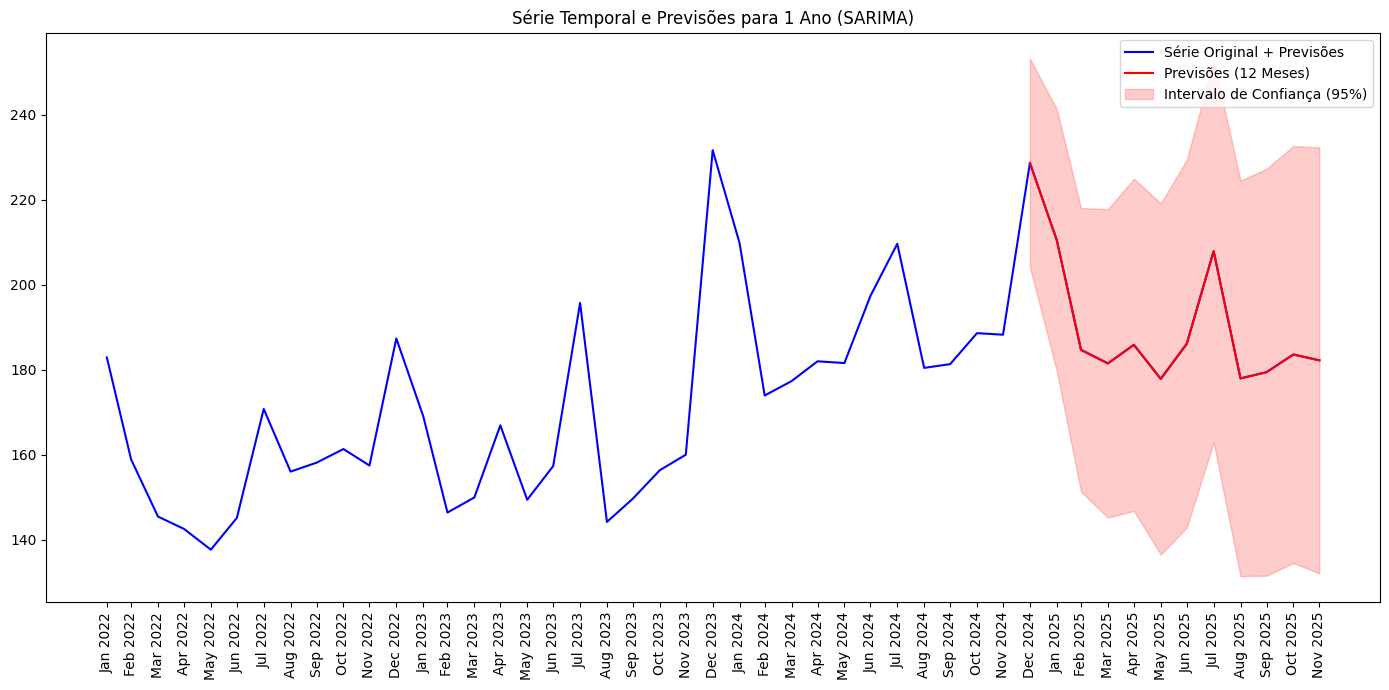

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

# Ajustando o modelo SARIMA para dados mensais
modelo_sarima = SARIMAX(ticket_medio_series, 
                        order=(3,0,0),        # Parâmetros ARIMA (p, d, q)
                        seasonal_order=(1, 0, 1, 12))  # Parâmetros sazonais (P, D, Q, s=12 para sazonalidade anual)

# Ajustando o modelo
modelo_ajustado = modelo_sarima.fit()

# Visualizar o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Plotar os resíduos para verificar o ajuste do modelo
residuos = modelo_ajustado.resid.dropna()  # Remove NaNs
plt.figure(figsize=(10, 5))
plt.plot(residuos)
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.title("Resíduos do Modelo SARIMA")
plt.show()

# Plotar o ACF dos resíduos
plot_acf(residuos, lags=12)  # Como é mensal, 12 lags cobrem um ano
plt.show()

# Fazer previsões para os próximos 12 meses com intervalo de confiança
previsao = modelo_ajustado.get_forecast(steps=12)
previsao_ano = previsao.predicted_mean  

# Obter intervalos de confiança (95% por padrão)
ic = previsao.conf_int()  
ic_inf = ic.iloc[:, 0]  # Primeira coluna (limite inferior)
ic_sup = ic.iloc[:, 1]  # Segunda coluna (limite superior)

# Criar datas futuras a partir do último índice da série original
datas_futuras = pd.date_range(ticket_medio_series.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Exibir previsões com intervalo de confiança
previsoes_df = pd.DataFrame({
    "Data": datas_futuras,
    "Previsão": previsao_ano,
    "IC Inferior": ic_inf,
    "IC Superior": ic_sup
})
print("\nPrevisões para os próximos 12 meses:")
print(previsoes_df.round(2).head(12))

# Concatenar os dados históricos com as previsões
dados_completos = pd.concat([ticket_medio_series, previsao_ano], axis=0)
intervalo_confiança_completo = pd.concat([ic_inf, ic_sup], axis=0)

# Plotar a série original e as previsões com intervalo de confiança
plt.figure(figsize=(14, 7))
plt.plot(dados_completos, label='Série Original + Previsões', color='blue')
plt.plot(datas_futuras, previsao_ano, label='Previsões (12 Meses)', color='red')

# Adicionar intervalo de confiança (sombreado)
plt.fill_between(datas_futuras, ic_inf, ic_sup, color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

# Detalhar mais o eixo X e colocar os meses em intervalos menores para toda a série
todas_datas = pd.date_range(ticket_medio_series.index[0], datas_futuras[-1], freq='M')
plt.xticks(todas_datas, [d.strftime('%b %Y') for d in todas_datas], rotation=90)  # Ticks verticais e formato de mês/ano

plt.title("Série Temporal e Previsões para 1 Ano (SARIMA)")
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Criar previsões dentro da amostra (in-sample) para comparação com valores reais
previsoes_in_sample = modelo_ajustado.fittedvalues

# Remover os primeiros valores onde a diferenciação pode ter gerado NaN
y_true = ticket_medio_series.iloc[1:]  # Ajustar para bater com previsões
y_pred = previsoes_in_sample.iloc[1:]

# Cálculo das métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Exibir as métricas
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 10.80
MSE: 226.98
RMSE: 15.07
MAPE: 6.32%
